<a href="https://colab.research.google.com/github/penguin64-128/python_practive1_titech/blob/main/Practice_2_titech_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Methodology of Mathematical and Computational Analysis I  
Graduate Major in Technology and Innovation Management  
Tokyo Institute of Technology  
2021 - Q1  
Class 6, Programming exercise 2  

Sasahara Kazutoshi, Mejia Cristian  
contact: `mejia.c.aa@m.titech.ac.jp`


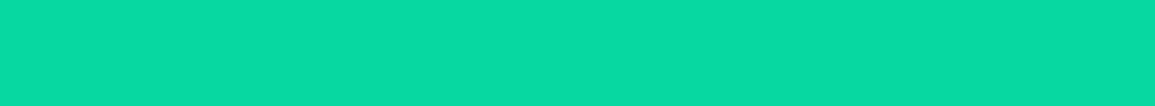

## Part 1. Supervised Learning

"Supervised learning is defined by its use of labeled datasets to train algorithms that to classify data or predict outcomes accurately. As input data is fed into the model, it adjusts its weights until the model has been fitted appropriately, which occurs as part of the cross validation process. Supervised learning helps organizations solve for a variety of real-world problems at scale, such as classifying spam in a separate folder from your inbox."<sup>1<sup>

In this notebook we will cover the following algorithms:

> 1. Linear Regression
> 2. Ridge Regression
> 3. LASSO Regression
> 4. Random Forest
> 5. Support Vector Machine
> 6. Artificial Neaural Networks

### Data

We are going to use the `USA_Housing` dataset. Since house price is a continuos variable, this is a regression problem. The data contains the following columns:

> * '`Avg. Area Income`': Avg. Income of residents of the city house is located in.
> * '`Avg. Area House Age`': Avg Age of Houses in same city
> * '`Avg. Area Number of Rooms`': Avg Number of Rooms for Houses in same city
> * '`Avg. Area Number of Bedrooms`': Avg Number of Bedrooms for Houses in same city
> * '`Area Population`': Population of city hou  se is located in
> * '`Price`': Price that the house sold at
> * '`Address`': Address for the house


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

🔴 #1 

#### Your turn!  
Load the dataset. 
The dataset can be downloaded directly from this URL:  

https://raw.githubusercontent.com/cristianmejia00/kajikawa_lab/master/Python-2021/USA_Housing.csv


In [16]:
from google.colab import drive
drive.mount('/content/drive')

# Get the dataset from an URL
dataset = pd.read_csv("USA_Housing.csv")
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Check the dataset
dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [21]:
# Get the column names
dataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Exploratory Data Analysis  

As a first step, we try to analyze the data visualy aiming to find patterns or outliers in the data.

🔴 #2 

#### Your turn!  
Generate a pairplot from the dataset.  


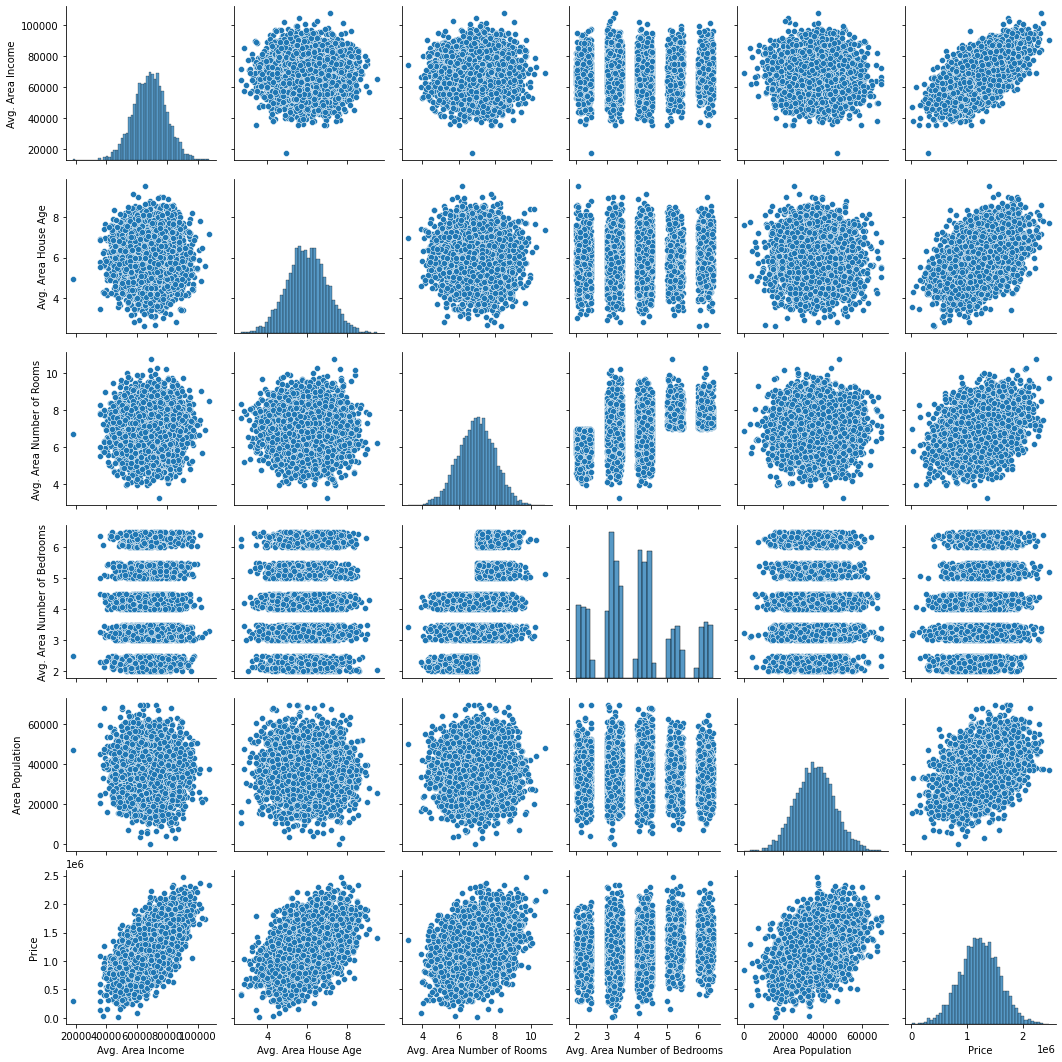

In [24]:
# Plot the dataset
#sns.pairplot(dataset)
sns.pairplot(dataset)

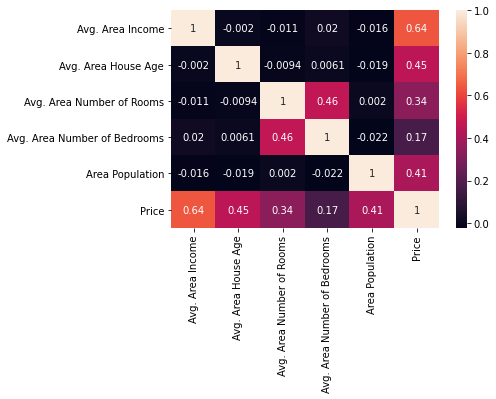

In [25]:
# Check correlations among variables
cor = dataset.corr()
sns.heatmap(cor, annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


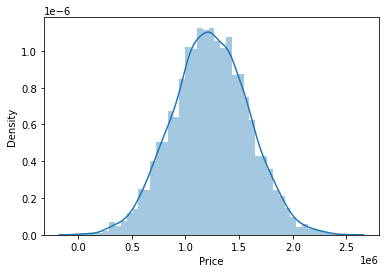

In [26]:
# Check the distribution of the main variable
sns.distplot(dataset['Price'])

### Training a Linear Regression Model

Let's now begin to train out regression model.  

We will need to:  
* first split up our data into an X array that contains the features to train on, and   
* a y array with the target variable, in this case the `Price column`.  

We will remove the `Address` column because it only has text info that the linear regression model can't use.

In [28]:
# Separate independent and dependent variables

X = dataset[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = dataset['Price']

# Note: Why double brackets?

### Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Preparing Data For Linear Regression  

Linear regression is been studied at great length, and there is a lot of literature on how your data must be structured to make best use of the model.

As such, there is a lot of sophistication when talking about these requirements and expectations which can be intimidating. In practice, you can uses these rules more as rules of thumb when using Ordinary Least Squares Regression, the most common implementation of linear regression.

Try different preparations of your data using these heuristics and see what works best for your problem.
- **Linear Assumption.** Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
- **Remove Noise.** Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.
- **Remove Collinearity.** Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.
- **Gaussian Distributions.** Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.
- **Rescale Inputs:** Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

### Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [35]:
# print the intercept
print(lin_reg.intercept_)

1228219.1492415662


In [36]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,232679.724643
Avg. Area House Age,163841.046593
Avg. Area Number of Rooms,121110.555478
Avg. Area Number of Bedrooms,2892.815119
Area Population,151252.342377


### Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [40]:
pred = lin_reg.predict(X_test)

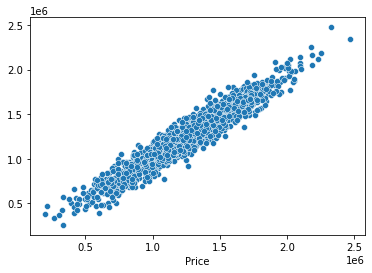

In [41]:
# Plot the our predictions against the truth.
sns.scatterplot(x=y_test, y=pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


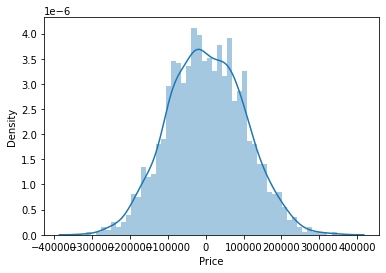

In [42]:
# Residual histogram
sns.distplot((y_test - pred), bins=50);

🔴 #3 

#### Your turn!  
Predict the price of a house that has the following conditions:

* `Avg. Area Income` = 80000
* `Avg. Area House Age` = 5
* `Avg. Area Number of Rooms` = 7
* `Avg. Area Number of Bedrooms` = 4
* `Area Population` = 23000


In [45]:
new_data = pipeline.transform([[80000,5,7,4,23000]])
price_prediction = lin_reg.predict(new_data)
print(price_prediction)

[2.20960886e+10]


### Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

> All of these are **loss functions**, because we want to minimize them.

In [46]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [47]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81135.56609336878
MSE: 10068422551.40088
RMSE: 100341.52954485436
R2 Square 0.9146818498754016
__________________________________
Train set evaluation:
_____________________________________
MAE: 81480.4997317489
MSE: 10287043161.197224
RMSE: 101425.06180031257
R2 Square 0.9192986579075526
__________________________________


In [48]:
# We will keep record of all model results for comparison at the end of Part 1.
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379


### Ridge Regression

Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

Ridge regression addresses some of the problems of **Ordinary Least Squares** by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

$$\min_{w}\big|\big|Xw-y\big|\big|^2_2+\alpha\big|\big|w\big|\big|^2_2$$

$\alpha>=0$ is a complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

Ridge regression is an L2 penalized model. Add the squared sum of the weights to the least-squares cost function.

In [49]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81428.64835535336
MSE: 10153269900.892609
RMSE: 100763.43533689494
R2 Square 0.9139628674464607
__________________________________
Train set evaluation:
_____________________________________
MAE: 81972.39058585507
MSE: 10382929615.143456
RMSE: 101896.66145239232
R2 Square 0.9185464334441484
__________________________________


In [50]:
# Add Ridge results to the comparison table.
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379


### LASSO Regression

A linear model that estimates sparse coefficients.

Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. The objective function to minimize is:

$$\min_{w}\frac{1}{2n_{samples}} \big|\big|Xw - y\big|\big|_2^2 + \alpha \big|\big|w\big|\big|_1$$

The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha \big|\big|w\big|\big|_1$ added, where $\alpha$ is a constant and $\big|\big|w\big|\big|_1$ is the $\ell_1-norm$ of the parameter vector.


In [51]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81135.6985172622
MSE: 10068453390.364521
RMSE: 100341.68321472648
R2 Square 0.914681588551116
__________________________________
Train set evaluation:
_____________________________________
MAE: 81480.63002185508
MSE: 10287043196.634295
RMSE: 101425.0619750084
R2 Square 0.9192986576295505
__________________________________


In [52]:
# Add Lasso results to the comparison table.
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
2,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379


### Random Forest

🔴 #4 

#### Your turn!  
At this point you may have started notice that the models follow the same pattern in the code. Please complete the following model: **bold text**

In [54]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred =  model.predict(X_test)
train_pred =  model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81135.6985172622
MSE: 10068453390.364521
RMSE: 100341.68321472648
R2 Square 0.914681588551116
__________________________________
Train set evaluation:
_____________________________________
MAE: 81480.63002185508
MSE: 10287043196.634295
RMSE: 101425.0619750084
R2 Square 0.9192986576295505
__________________________________


In [55]:
# Add Random Forest results to the comparison table.
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
2,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
3,Random Forest Regressor,81135.698517,1.006845e+10,100341.683215,0.914682,0.000000


### Support Vector Machine

In [56]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 87205.73051513643
MSE: 11720932765.132284
RMSE: 108263.25676392838
R2 Square 0.9006787511995369
__________________________________
Train set evaluation:
_____________________________________
MAE: 73692.56848247455
MSE: 9363827731.3416
RMSE: 96766.87310924953
R2 Square 0.9265412370493255
__________________________________


In [57]:
# Add SVM results to the comparison table.
results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
2,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
3,Random Forest Regressor,81135.698517,1.006845e+10,100341.683215,0.914682,0.000000
4,SVM Regressor,87205.730515,1.172093e+10,108263.256764,0.900679,0.000000


### Artficial Neural Network

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)

Epoch 1/100
3500/3500 [==============================] - 8s 2ms/step - loss: 1631264330775.1064 - val_loss: 1658066698240.0000
Epoch 2/100
3500/3500 [==============================] - 7s 2ms/step - loss: 1660307922220.9700 - val_loss: 1655831265280.0000
Epoch 3/100
3500/3500 [==============================] - 7s 2ms/step - loss: 1628694212557.6921 - val_loss: 1646571814912.0000
Epoch 4/100
3500/3500 [==============================] - 7s 2ms/step - loss: 1610260213924.9631 - val_loss: 1621048426496.0000
Epoch 5/100
3500/3500 [==============================] - 7s 2ms/step - loss: 1620928834883.1990 - val_loss: 1564961931264.0000
Epoch 6/100
3500/3500 [==============================] - 7s 2ms/step - loss: 1528194479588.0674 - val_loss: 1459311214592.0000
Epoch 7/100
3500/3500 [==============================] - 7s 2ms/step - loss: 1389207647861.1414 - val_loss: 1284111859712.0000
Epoch 8/100
3500/3500 [==============================] - 7s 2ms/step - loss: 1215345357105.3574 - val_loss: 103

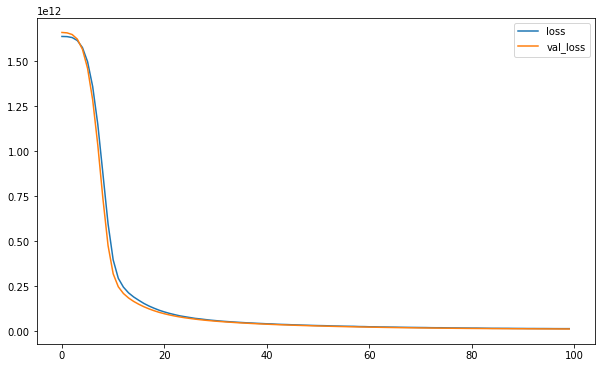

In [61]:
plt.figure(figsize=(10, 6))

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [62]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 92072.88753875458
MSE: 13727393402.85865
RMSE: 117163.95948779919
R2 Square 0.8836763350777763
__________________________________
Train set evaluation:
_____________________________________
MAE: 94745.31579636465
MSE: 14538063974.00813
RMSE: 120573.89424750338
R2 Square 0.8859496110064174
__________________________________


In [63]:
# Add Artificial Neural Network results to the comparison table.
results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,MAE,MSE,RMSE,R2 Square,Cross Validation,Model
0,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379,NaN
1,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379,NaN
2,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379,NaN
3,81135.698517,1.006845e+10,100341.683215,0.914682,0.000000,NaN
4,87205.730515,1.172093e+10,108263.256764,0.900679,0.000000,NaN
5,92072.887539,1.372739e+10,117163.959488,0.883676,0.000000,Artficial Neural Network


### Models Comparison

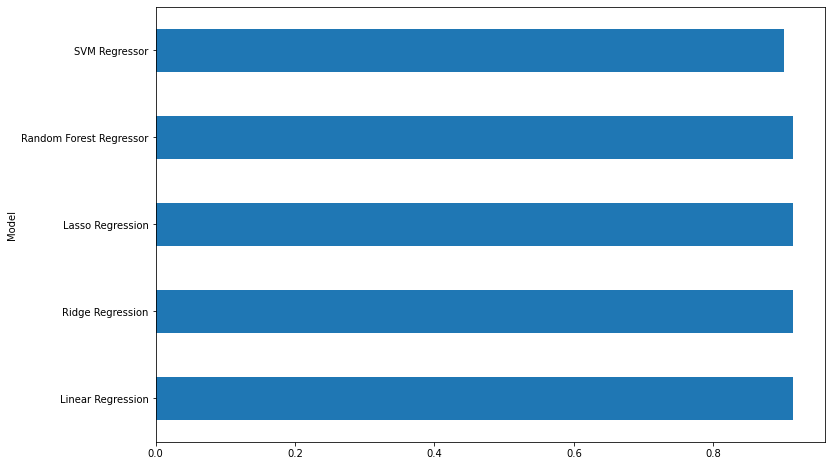

In [59]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

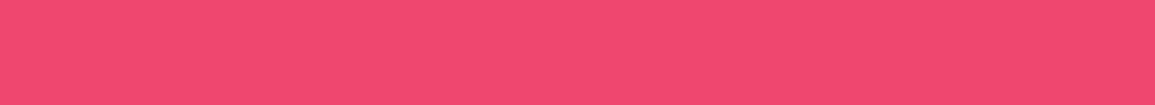

## Part 2. Unsupervised Learning

### Clustering

"Unsupervised learning is a type of algorithm that learns patterns from untagged data." <sup>2<sup> 

### Data

In this exercise we are working with a simple dataset containing shopping mall customer data. It contains the following columns:

* `CustomerID` a numeric ID number per row  
* `Gender` 
* `Age`
* `Income` Yearly income in 1000s USD
* `Score` from 1 to 100 being 100 those who spend more in the sopping mall

In [60]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/cristianmejia00/kajikawa_lab/master/Python-2021/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


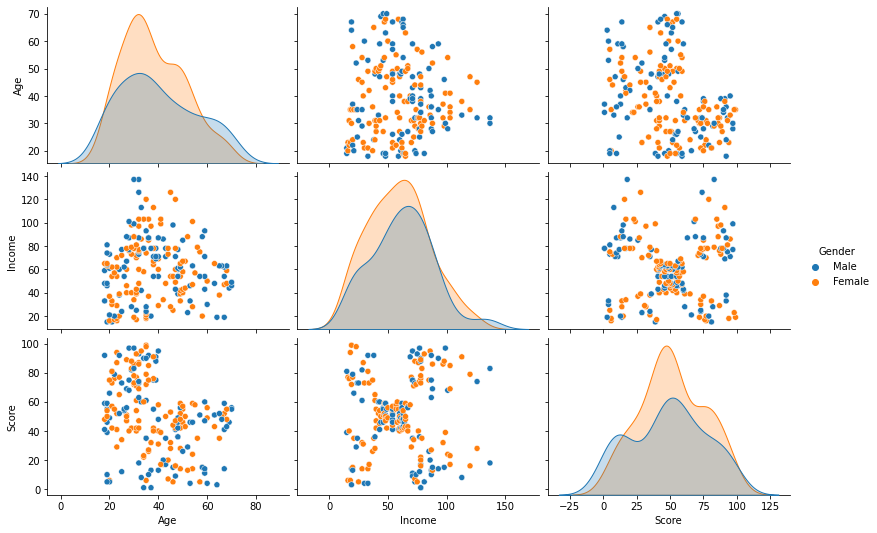

In [64]:
# Exploratory Data Analisys
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)

🔴 #5 

#### Your turn!  
Remove the `CustomerID` and `Gender` columns from the dataset.

In [65]:
dataset2 = df.drop(['CustomerID', 'Gender'], axis=1)
dataset2.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


When we do not have an intuition of the number of clusters in the dataset, we may use auxiliary techniques to find good choices. Here we apply the "elbow" method to attempt to find a good number of clusters.  

In [66]:
# Elbow method
# Compute the WCSS (Within-Cluster Sum of Squares)
from sklearn.cluster import KMeans

wcss = []

# Let's try for clusters 1 to 11
for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(dataset2)
    wcss.append(model.inertia_)

Text(0, 0.5, 'Inertia')

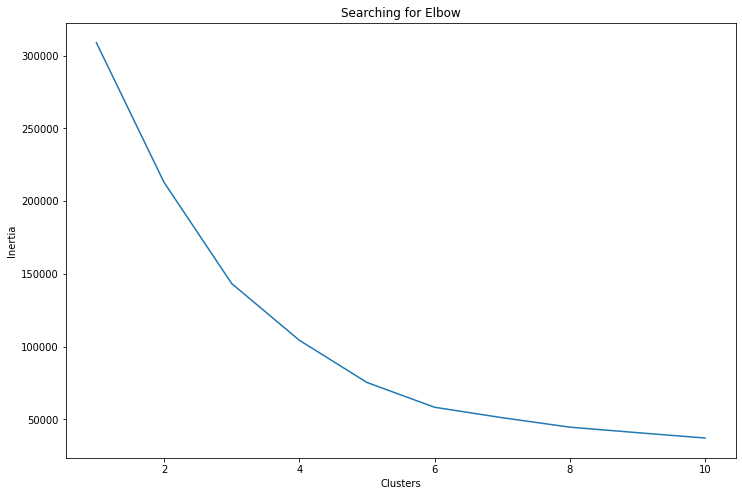

In [67]:
# Plot the elbow curve
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=wcss, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


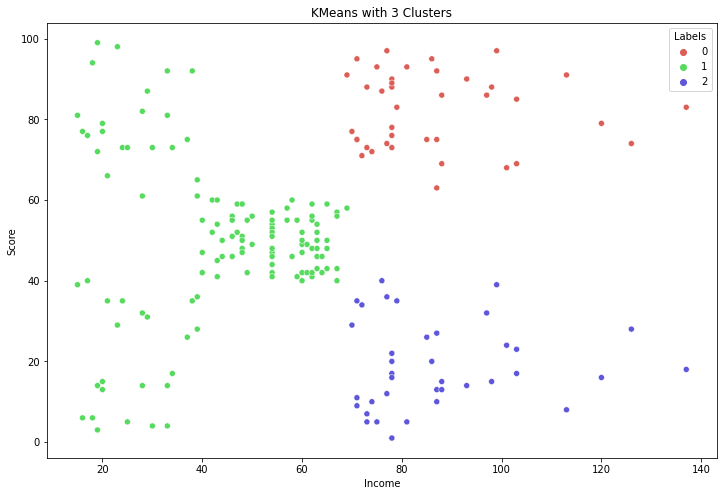

In [68]:
# Let's try with 3 cluster
model_3_clusters = KMeans(n_clusters=3)
model_3_clusters.fit(dataset2)

# Add column with clusters' ids
dataset2['Labels'] = model_3_clusters.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(dataset2['Income'], dataset2['Score'], hue=dataset2['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

🔴 #6

Your turn!  
Let's try with 5 clusters.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


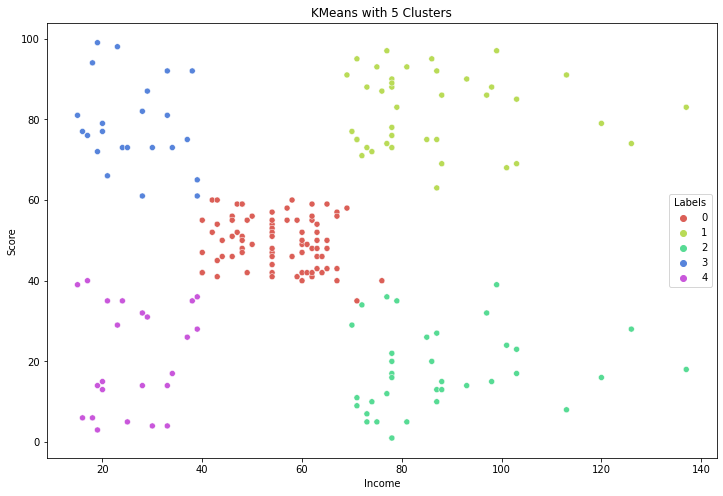

In [74]:
# Let's try with 5 cluster
model_5_clusters = KMeans(n_clusters=5)
model_5_clusters.fit(dataset2)

# Add column with clusters' ids
dataset2['Labels'] = model_5_clusters.labels_


plt.figure(figsize=(12, 8))
sns.scatterplot(dataset2['Income'], dataset2['Score'], hue=dataset2['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

By judging from the plots we could say that 5 cluster seems better than the 3 ones. As this is a unsupervised problem we can't really know for sure which one is the best in real life but by looking at the data it's safe to say that 5 would be our choice.

We can analyze our 5 clusters in detail now:

>Label 0 is low income and low spending  
>Label 1 is high income and high spending  
>Label 2 is mid income and mid spending  
>Label 3 is high income and low spending  
>Label 4 is low income and high spending  

---

### Principal Component Analysis

PCA helps us reduce highly dimensional data to a desired number of dimensions. This is helpful to visualize highdimensional data in 3d or 2d. 

In this exercise we are using MNIST dataset. Which is a dataset of handwritten digits. Each digit is represented with 64 dimensions (columns in the dataset). 

This dataset is so popular that it comes already integrated in sklearn.

In [70]:
# Load the data
from sklearn import datasets
digits = datasets.load_digits()

X = digits.data
y = digits.target

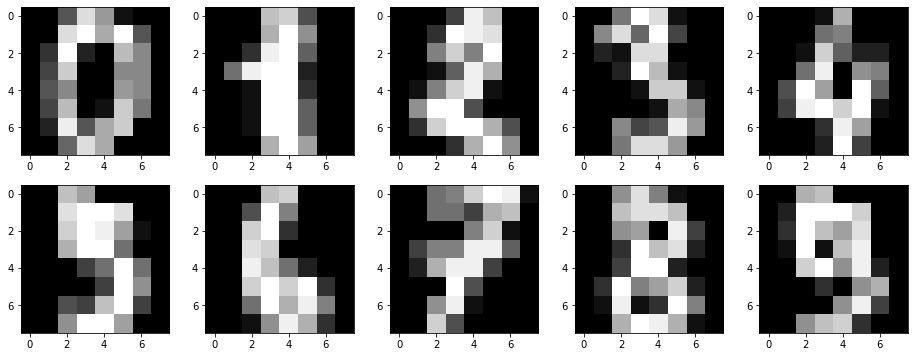

In [71]:
# Visualize the data
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray');

Our data has 64 dimensions, but we are going to reduce it to only 2 and see that, even with just 2 dimensions, we can clearly see that digits separate into clusters.

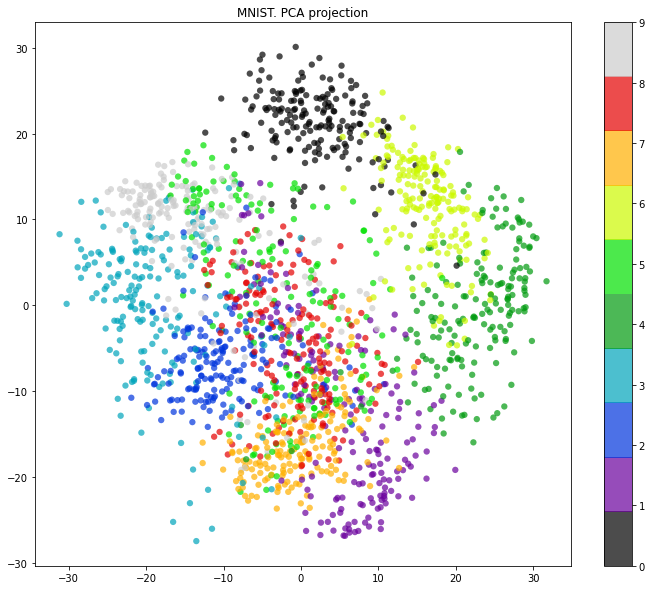

In [72]:
from sklearn import decomposition

# Compute PCA
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot
plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

We can apply "t-SNE". The plot will look better because PCA has a linear constraint while t-SNE does not.  
The t-SNE algorithm takes more time to complete than PCA.

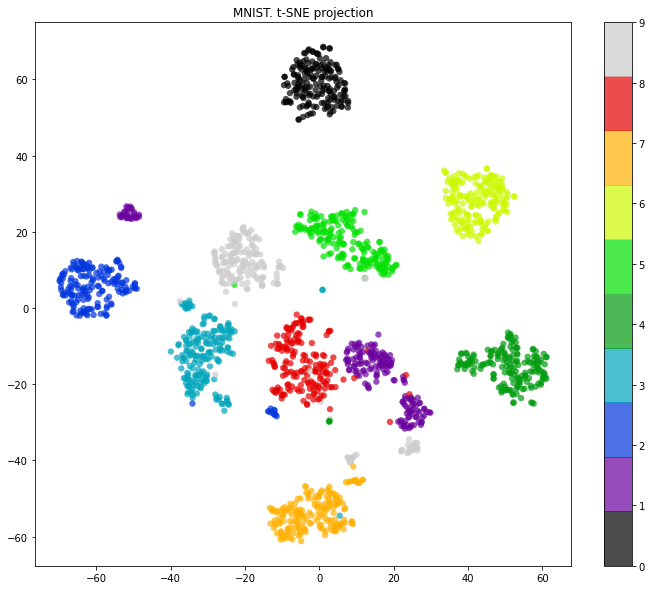

In [73]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection');

---

## References

1. https://www.ibm.com/cloud/learn/supervised-learning#:~:text=Supervised%20learning%2C%20also%20known%20as,data%20or%20predict%20outcomes%20accurately.
2. https://en.wikipedia.org/wiki/Unsupervised_learning

* https://en.wikipedia.org/wiki/Principal_component_analysis
* https://blog.albert2005.co.jp/2015/12/02/tsne/
